<a href="https://colab.research.google.com/github/spreadzp/ml-price-predictor/blob/master/GooglePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# program predicts



In [0]:
# import libs
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import  LinearRegression
import matplotlib.pyplot as plt




In [7]:
# Load data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('GOOG.csv')
df.head(7)

Saving GOOG.csv to GOOG.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-14,1049.979980,1062.599976,1040.790039,1042.099976,1042.099976,1686600
1,2018-12-17,1037.510010,1053.150024,1007.900024,1016.530029,1016.530029,2385400
2,2018-12-18,1026.089966,1049.479980,1021.440002,1028.709961,1028.709961,2192500
3,2018-12-19,1033.989990,1062.000000,1008.049988,1023.010010,1023.010010,2479300
4,2018-12-20,1018.130005,1034.219971,996.359985,1009.409973,1009.409973,2673500
5,2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000
6,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300


In [0]:
# Create lists x\Y
dates = []
prices = []


In [8]:
#Get number rows in dataset
df.shape

(252, 7)

In [9]:
#Get last row
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
251,2019-12-13,1347.949951,1352.97998,1343.920044,1347.829956,1347.829956,1550028


In [13]:
# Get all the data except
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-14,1049.979980,1062.599976,1040.790039,1042.099976,1042.099976,1686600
1,2018-12-17,1037.510010,1053.150024,1007.900024,1016.530029,1016.530029,2385400
2,2018-12-18,1026.089966,1049.479980,1021.440002,1028.709961,1028.709961,2192500
3,2018-12-19,1033.989990,1062.000000,1008.049988,1023.010010,1023.010010,2479300
4,2018-12-20,1018.130005,1034.219971,996.359985,1009.409973,1009.409973,2673500
...,...,...,...,...,...,...,...
243,2019-12-03,1279.569946,1298.461060,1279.000000,1295.280029,1295.280029,1143800
244,2019-12-04,1307.010010,1325.800049,1304.869995,1320.540039,1320.540039,1537500
245,2019-12-05,1328.000000,1329.358032,1316.439941,1328.130005,1328.130005,1212700
246,2019-12-06,1333.439941,1344.000000,1333.439941,1340.619995,1340.619995,1314800


In [14]:
# The new shape
df.shape

(248, 7)

In [0]:
# Get all rows from date column
df_dates = df.loc[:, 'Date']
# Get all rows from open column
df_open = df.loc[:, 'Open']


In [0]:
# Get all rows from date column
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
# Create the dependent data
for open_price in df_open:
  prices.append(float(open_price))

In [26]:
print(dates)

[[14], [17], [18], [19], [20], [21], [24], [26], [27], [28], [31], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [22], [23], [24], [25], [28], [29], [30], [31], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [19], [20], [21], [22], [25], [26], [27], [28], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [28], [29], [1], [2], [3], [4], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [22], [23], [24], [25], [26], [29], [30], [1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27], [28], [1], [2], [3], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30], [31], [1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26],

In [0]:
# 
def predict_prices(dates, prices, x):
  # Create 3 regress model
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

  #Train the SVR
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)

  # Create lin model
  lin_reg = LinearRegression()
  # Train LRM
  lin_reg.fit(dates,prices)

  # Plot models on a graph
  plt.scatter(dates,prices, color='black',label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red',label='SVR_RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue',label='SVR_Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green',label='SVR_Linear')
  plt.plot(dates, lin_reg.predict(dates), color='Yellow',label='Lin Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()

  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


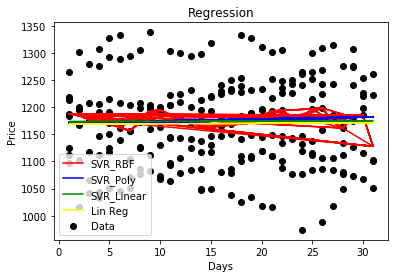

(1156.9474776483291, 1184.5365624527233, 1630.0626350366485, 1185.7619010790029)


In [45]:
# Predict the price on day
predicted_price = predict_prices(dates, prices, [[200]])
print(predicted_price)